### 0. Packages Installation!

In [1]:
!pip install selenium

     |████████████████████████████████| 904 kB 2.9 MB/s eta 0:00:01


In [2]:
!pip install parsel

**Install chrome**

In [3]:
!apt-get update # to update ubuntu to correctly run apt install

Get:1 http://packages.cloud.google.com/apt gcsfuse-bionic InRelease [3724 B]
Get:2 http://packages.cloud.google.com/apt cloud-sdk-bionic InRelease [6384 B] 
Get:3 http://packages.cloud.google.com/apt cloud-sdk InRelease [6349 B]        
Get:4 http://packages.cloud.google.com/apt cloud-sdk-bionic/main amd64 Packages [147 kB]
Get:5 http://packages.cloud.google.com/apt cloud-sdk/main amd64 Packages [140 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease                       
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]      
Get:9 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [205 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [1733 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]   
Get:12 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1348 kB]
Get:13 h

In [4]:
!apt install -y chromium-chromedriver

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra libgbm1
  libwayland-server0
Suggested packages:
  webaccounts-chromium-extension unity-chromium-extension adobe-flashplugin
The following NEW packages will be installed:
  chromium-browser chromium-browser-l10n chromium-chromedriver
  chromium-codecs-ffmpeg-extra libgbm1 libwayland-server0
0 upgraded, 6 newly installed, 0 to remove and 110 not upgraded.
Need to get 80.2 MB of archives.
After this operation, 272 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libwayland-server0 amd64 1.16.0-1ubuntu1.1~18.04.3 [29.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libgbm1 amd64 20.0.8-0ubuntu1~18.04.1 [27.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-codecs

### 1.1 Opening Linkedin with `webdriver.Chrome()`

In [5]:
import time 
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
t0 = time.time()
driver = 'path_to_drivers_suchas:drivers/chromedriver/linux64/86.0.4240.22/chromedriver' # should be replaced by the path to your chromedriver
driver = webdriver.Chrome(driver)

driver.get('https://www.linkedin.com')
username = driver.find_element_by_name('session_key')
username.send_keys('you email address')
password = driver.find_element_by_name('session_password')
password.send_keys('your password')
log_in_button = driver.find_element_by_class_name('sign-in-form__submit-button')
log_in_button.click()

### 1.2. Import the `Selector` from `parsel` for scrapping linkedin accounts.
#### Step 1. Which `url link` is used to scrap?

In [6]:
from parsel import Selector

## List of url link
links = ['https://uk.linkedin.com/in/thornbeck',
         'https://uk.linkedin.com/in/pauljgarner', 
         'https://uk.linkedin.com/in/eastwoodalex', 
         'https://uk.linkedin.com/in/navaneetham', 
         'https://www.linkedin.com/in/hoan-huynh-8b3ba9b6', 
         'https://www.linkedin.com/in/yoelohayon', 
         'https://www.linkedin.com/in/siddharthsatpathy']

## initialize empty list
names = []
jobs = []
company = []
education = []
location = []
school = []

**Step 2: finding `xpath`**
For example, you can find the infomation of the `job title` by searching the `inspect` then copy its `full xpath`

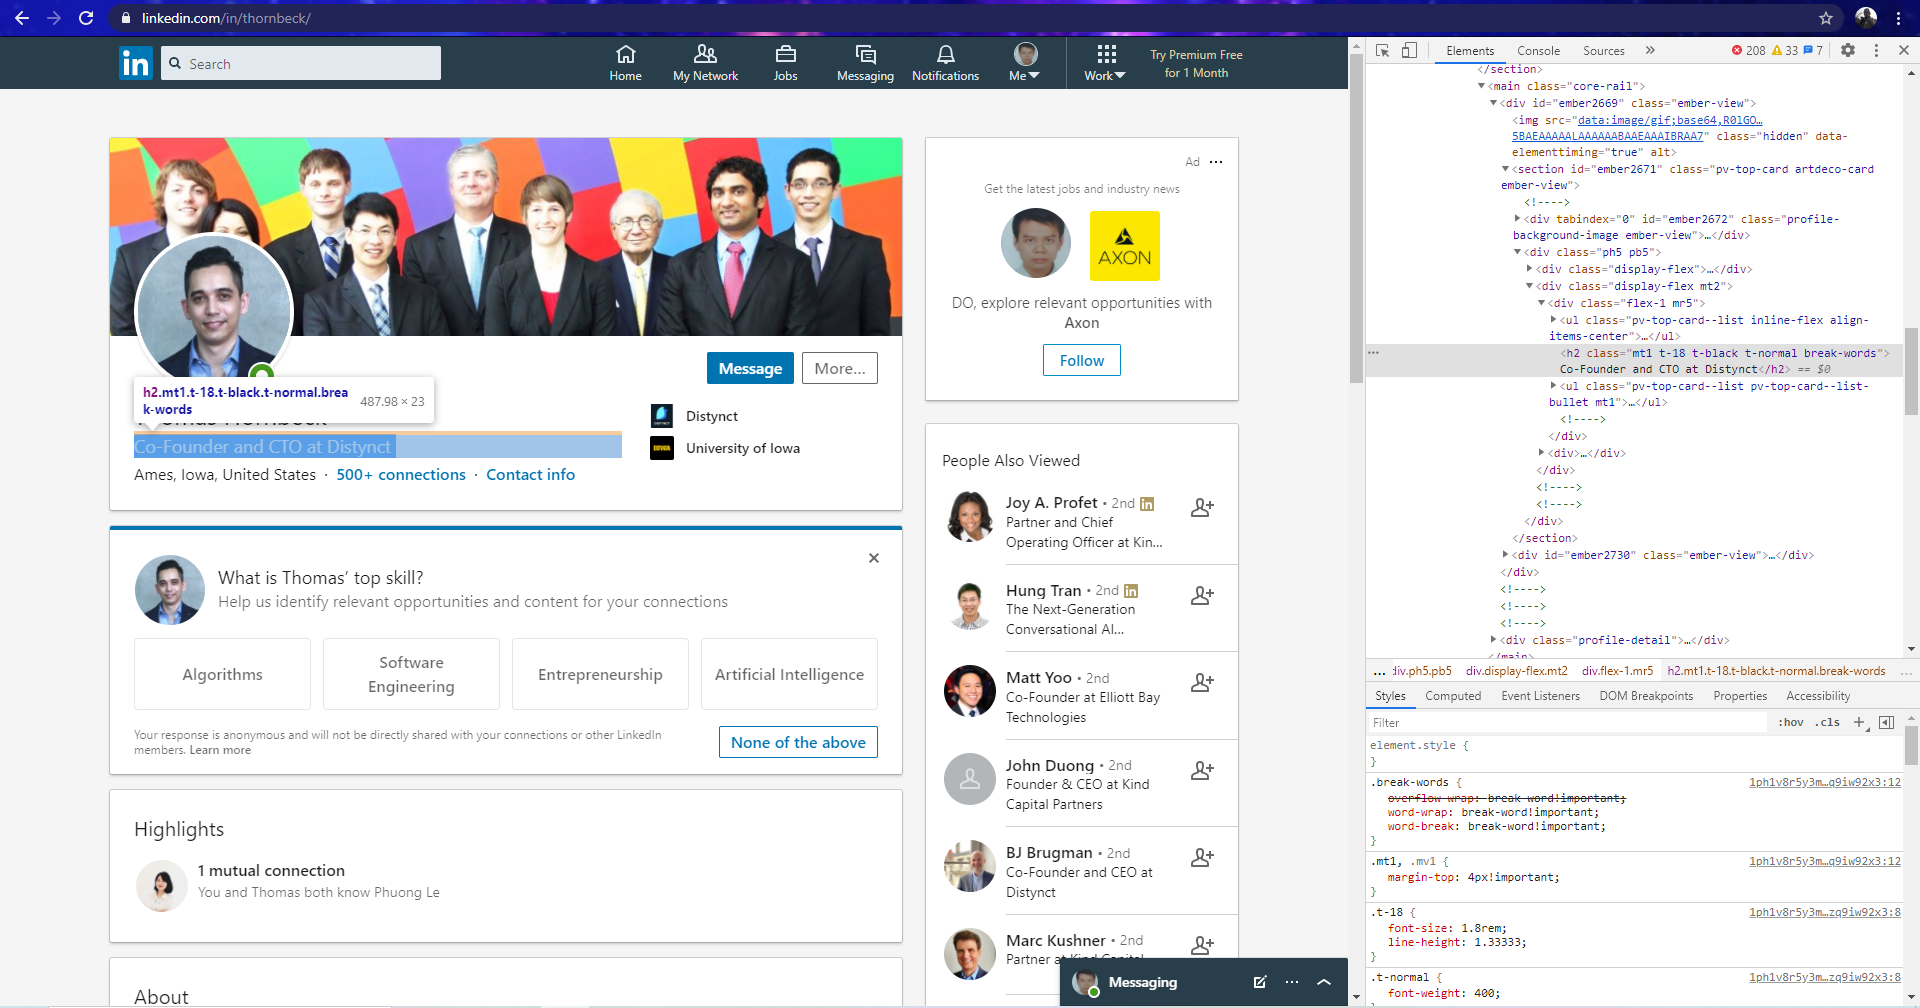

In [7]:
## display

In [9]:
## append the obtained values from Selector function
for path in links:
    driver.get(path)
    sel = Selector(text=driver.page_source) 
    names.append( sel.xpath('//*[@id="ember61"]/div[2]/div[2]/div[1]/ul[1]/li[1]/text()').extract_first() )
    jobs.append( sel.xpath('//*[@id="ember61"]/div[2]/div[2]/div[1]/h2/text()').extract_first() )
    company.append(sel.xpath('/html/body/div[7]/div[3]/div/div/div/div/div[2]/main/div[1]/section/div[2]/div[2]/div[2]/ul/li[1]/a/span/text()').extract_first())
    education.append(sel.xpath('/html/body/div[7]/div[3]/div/div/div/div/div[2]/main/div[2]/div[5]/span/div/section/div[2]/section/ul/li[1]/div/div/a/div[2]/div/p[1]/span[2]/text()').extract_first())
    location.append(sel.xpath('/html/body/div[7]/div[3]/div/div/div/div/div[2]/main/div[1]/section/div[2]/div[2]/div[1]/ul[2]/li[1]/text()').extract_first())
    school.append(sel.xpath('/html/body/div[7]/div[3]/div/div/div/div/div[2]/main/div[2]/div[5]/span/div/section/div[2]/section/ul/li[1]/div/div/a/div[2]/div/h3/text()').extract_first())

## 2. `pandas.DataFrame()` to lookback your database

In [10]:
import pandas as pd
df = pd.DataFrame({'name': names, 
                   'job title': jobs, 
                   'company': company, 
                   'education': education, 
                   'school': school, 
                   'location': location, 
                   'url': links}) 
df

,name,job title,company,education,school,location,url
0,\n Thomas Hornbeck\n,\n Co-Founder and CTO at Distynct\n,Distynct\n\n,"PhD ABD, Computer Science",University of Iowa,"Ames, Iowa, United States\n",https://uk.linkedin.com/in/thornbeck
1,\n Paul Garner\n,\n Freelance Python Developer at Depop\n,Depop\n\n,None,None,"\n London, Greater London, United Kingdom \n\n",https://uk.linkedin.com/in/pauljgarner
2,\n Alex Eastwood\n,\n Software Engineering Manager at ...,Granicus\n\n,Master's Degree,UCL,"\n London, United Kingdom\n\n",https://uk.linkedin.com/in/eastwoodalex
3,\n Navaneetham Selvadurai\n,\n C++/Python consultant\n,Bank of America\n\n,B.E,Kongu Engineering College,\n United Kingdom\n,https://uk.linkedin.com/in/navaneetham
4,\n Hoan Huynh\n,\n Web developer at Sutrix media\n,Sutrix media\n\n,None,None,\n Vietnam\n,https://www.linkedin.com/in/hoan-huynh-8b3ba9b6
5,\n Yoel Ohayon\n,\n Clinical Associate Professor of ...,New York University\n\n,Doctor of Philosophy (Ph.D.),New York University,\n Greater New York City Area\n\n,https://www.linkedin.com/in/yoelohayon
6,\n Siddharth Satpathy\n,\n Machine Learning Engineer at Cis...,Cisco\n\n,Doctor of Philosophy (Ph.D.),Carnegie Mellon University,\n San Francisco Bay Area\n\n,https://www.linkedin.com/in/siddharthsatpathy


**text-processing**

In [11]:
def remove(x):
    if x == None:
        x = None
    else:
        x = x.replace('\n\t', '').replace('\n', '')
    return x
for col in df.columns:
    df[col] = df[col].apply(lambda x : remove(x))
df

,name,job title,company,education,school,location,url
0,Thomas Hornbeck,Co-Founder and CTO at Distynct,Distynct,"PhD ABD, Computer Science",University of Iowa,"Ames, Iowa, United States",https://uk.linkedin.com/in/thornbeck
1,Paul Garner,Freelance Python Developer at Depop,Depop,None,None,"London, Greater London, United Kingdom",https://uk.linkedin.com/in/pauljgarner
2,Alex Eastwood,Software Engineering Manager at Gr...,Granicus,Master's Degree,UCL,"London, United Kingdom",https://uk.linkedin.com/in/eastwoodalex
3,Navaneetham Selvadurai,C++/Python consultant,Bank of America,B.E,Kongu Engineering College,United Kingdom,https://uk.linkedin.com/in/navaneetham
4,Hoan Huynh,Web developer at Sutrix media,Sutrix media,None,None,Vietnam,https://www.linkedin.com/in/hoan-huynh-8b3ba9b6
5,Yoel Ohayon,Clinical Associate Professor of Ch...,New York University,Doctor of Philosophy (Ph.D.),New York University,Greater New York City Area,https://www.linkedin.com/in/yoelohayon
6,Siddharth Satpathy,Machine Learning Engineer at Cisco,Cisco,Doctor of Philosophy (Ph.D.),Carnegie Mellon University,San Francisco Bay Area,https://www.linkedin.com/in/siddharthsatpathy


## 3. Save & verifying saved-`csv.file`

In [12]:
df.to_csv('linkedin.csv')
print(time.time() - t0)

30.34916400909429


In [13]:
pd.read_csv('linkedin.csv')

,Unnamed: 0,name,job title,company,education,school,location,url
0,0,Thomas Hornbeck,Co-Founder and CTO at Distynct,Distynct,"PhD ABD, Computer Science",University of Iowa,"Ames, Iowa, United States",https://uk.linkedin.com/in/thornbeck
1,1,Paul Garner,Freelance Python Developer at Depop,Depop,NaN,NaN,"London, Greater London, United Kingdom",https://uk.linkedin.com/in/pauljgarner
2,2,Alex Eastwood,Software Engineering Manager at Gr...,Granicus,Master's Degree,UCL,"London, United Kingdom",https://uk.linkedin.com/in/eastwoodalex
3,3,Navaneetham Selvadurai,C++/Python consultant,Bank of America,B.E,Kongu Engineering College,United Kingdom,https://uk.linkedin.com/in/navaneetham
4,4,Hoan Huynh,Web developer at Sutrix media,Sutrix media,NaN,NaN,Vietnam,https://www.linkedin.com/in/hoan-huynh-8b3ba9b6
5,5,Yoel Ohayon,Clinical Associate Professor of Ch...,New York University,Doctor of Philosophy (Ph.D.),New York University,Greater New York City Area,https://www.linkedin.com/in/yoelohayon
6,6,Siddharth Satpathy,Machine Learning Engineer at Cisco,Cisco,Doctor of Philosophy (Ph.D.),Carnegie Mellon University,San Francisco Bay Area,https://www.linkedin.com/in/siddharthsatpathy
